Importing required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")


Loading the datasets

In [13]:
# Load the datasets
# df1 is usually the "Unemployment in India.csv" (includes Area: Urban/Rural)
# df2 is usually the "Unemployment_Rate_upto_11_2020.csv" (State-wise)
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

Data Cleaning

In [14]:
# 1. Remove extra spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# 2. Remove any completely empty rows
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# 3. Fix the Date column (Important for Time Series)
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# 4. Create a 'Month' column for easier plotting
df2['Month'] = df2['Date'].dt.month_name()


Regional Analysis

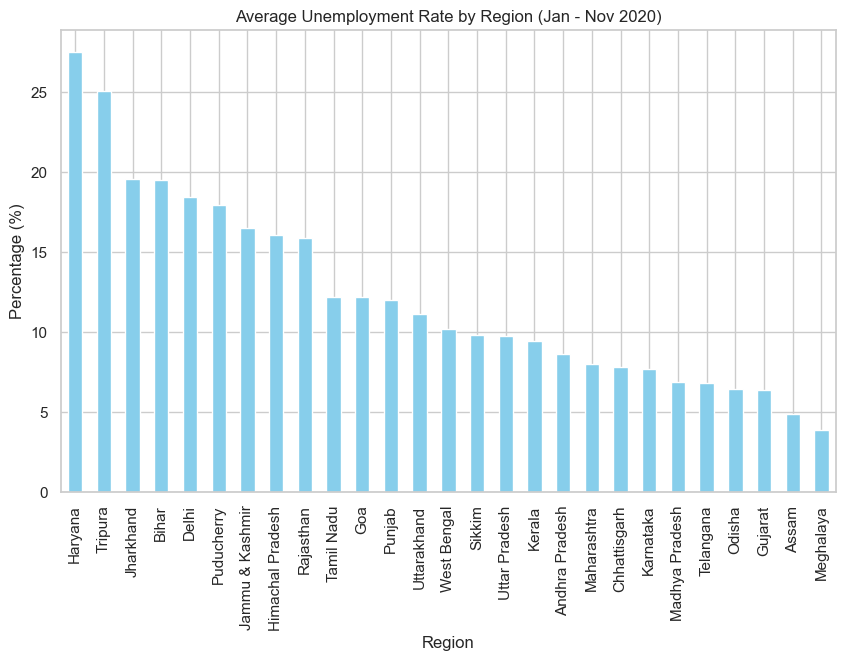

In [15]:
plt.figure(figsize=(10, 6))
# We sort by rate to make the bar chart readable
state_stats = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
state_stats.plot(kind='bar', color='skyblue')

plt.title('Average Unemployment Rate by Region (Jan - Nov 2020)')
plt.ylabel('Percentage (%)')
plt.show()


The "COVID Spike" Analysis

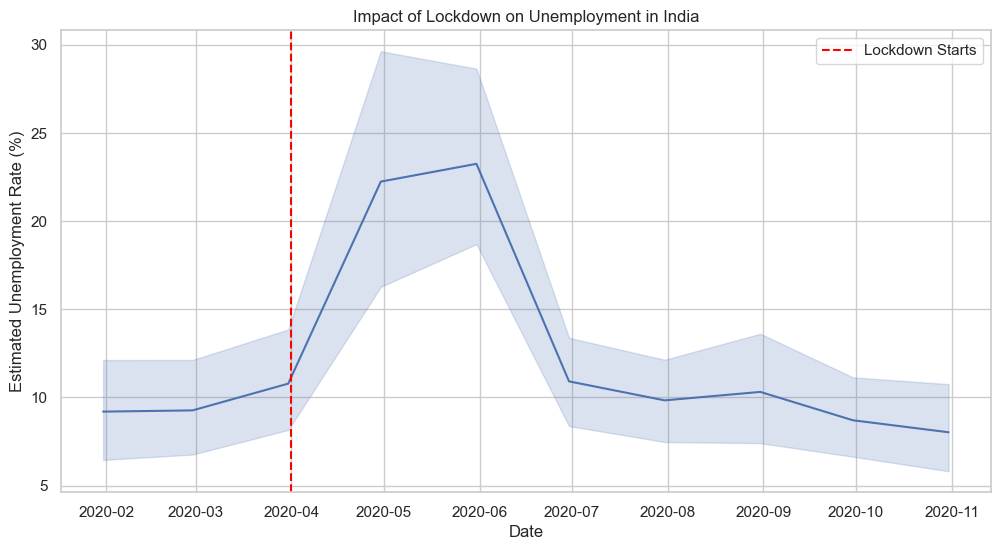

In [16]:
plt.figure(figsize=(12, 6))
# Line plot showing the trend over months
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Impact of Lockdown on Unemployment in India')
plt.axvline(pd.Timestamp('2020-04-01'), color='red', linestyle='--', label='Lockdown Starts')
plt.legend()
plt.show()

Their is a massive spike around April 2020 where the rate jumps from ~8% to over 23%.


Urban vs Rural (Area Analysis) - 

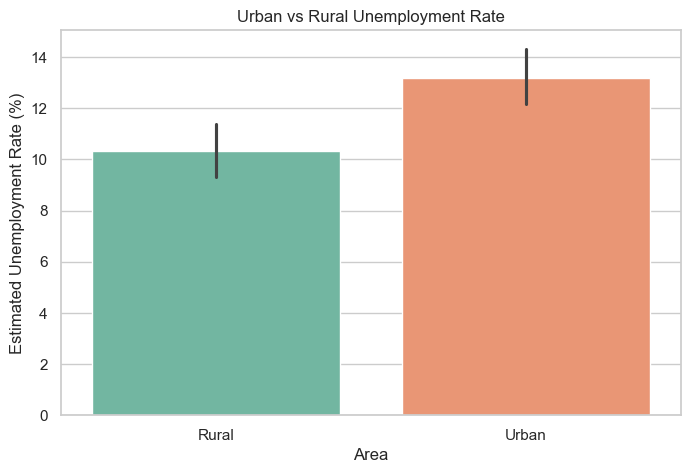

In [17]:
#To see if the lockdown affected city workers more than village workers. We use df1 because it contains the "Area" column.
plt.figure(figsize=(8, 5))
sns.barplot(data=df1, 
            x='Area', 
            y='Estimated Unemployment Rate (%)', 
            palette='Set2',
            hue='Area',
            legend=False)

plt.title('Urban vs Rural Unemployment Rate')
plt.show()

Correlation Matrix

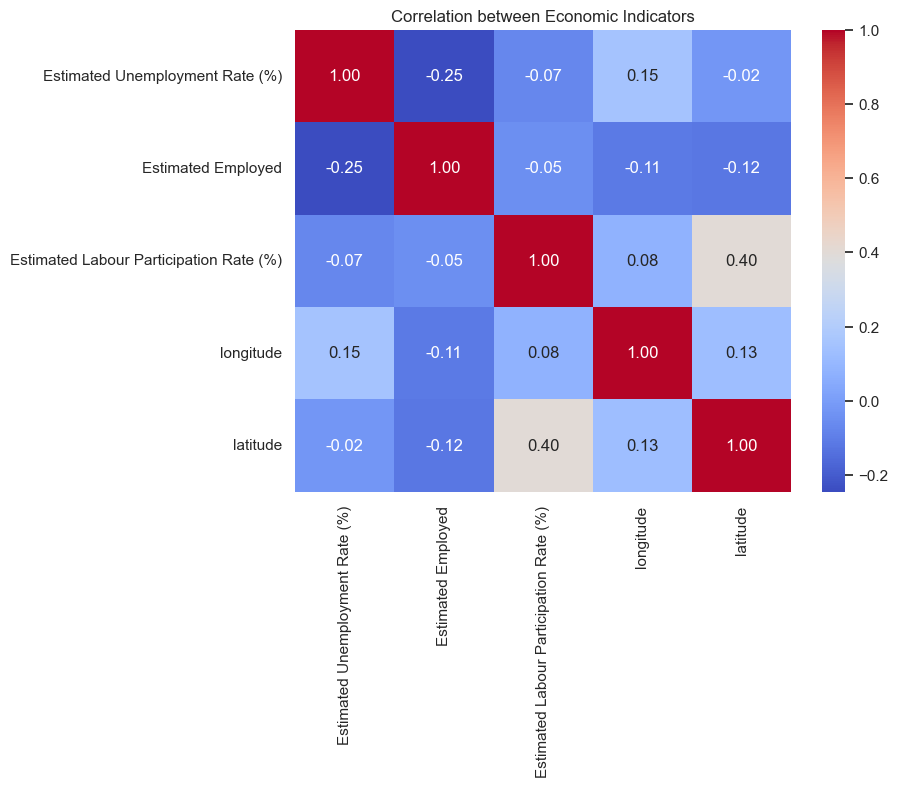

In [18]:
plt.figure(figsize=(8, 6))
# We only use numeric columns for correlation
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Economic Indicators')
plt.show()

# 📊 Conclusion: Unemployment Analysis in India (2020)

### 1. The COVID-19 "Lockdown Spike"
The analysis clearly indicates that the unemployment rate in India was relatively stable around **8–9%** in early 2020. However, following the nationwide lockdown, there was a massive surge in **April and May 2020**, where the rate peaked at over **23%**. This demonstrates the immediate and severe impact of the pandemic on the labor market.

### 2. Regional Insights
The impact was not uniform across all states:
* **High-Impact States:** Regions like **Haryana, Tripura, and Bihar** consistently showed the highest unemployment rates, often exceeding **25-30%** during the peak.
* **Resilient States:** States like **Meghalaya and Odisha** maintained significantly lower rates, suggesting different regional economic structures or better local management.

### 3. Urban vs. Rural Divide
* **Urban areas** faced a higher and more volatile unemployment rate compared to **Rural areas**.
* **Reason:** This is likely because urban jobs in the service and industrial sectors were halted, whereas the **Agricultural sector** in rural areas was classified as an essential service and continued to operate.

### 4. Correlation of Indicators
The **Correlation Heatmap** confirmed a strong relationship between the **Estimated Unemployment Rate** and the **Labor Participation Rate**. As unemployment spiked, the participation rate often dropped, showing that many individuals stopped looking for work entirely during the height of the crisis.

---
**Summary:** This project highlights that the 2020 pandemic was an unprecedented shock to the Indian economy, with the recovery being slower in urban industrial hubs compared to rural agricultural regions.
